# Access Control Effector - Investigate Response Times

This notebook helps to analyze single response-time.csv files to understand the nature of the response times.

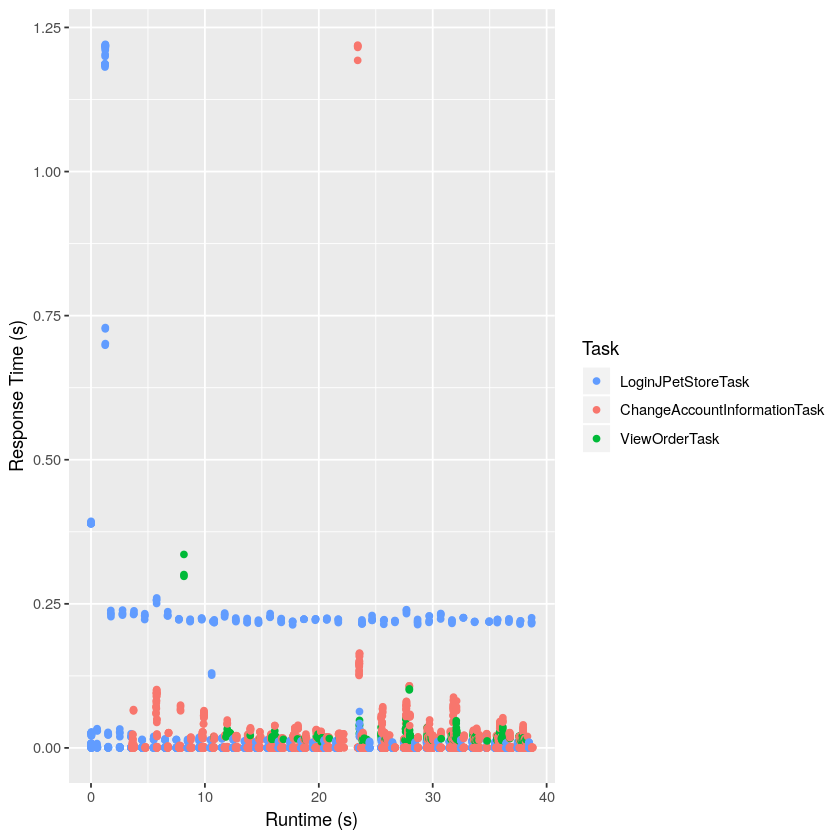

In [139]:
base_path <- "data/probe-experiment-node2"
experiment <- 1
model_size <- 2

data_path <- sprintf("%s/exp-%d/%d/response-time/response-time.csv", base_path, experiment, model_size)

data <- read.csv(data_path, header=TRUE)

data <- data[ which(data$event.type == 'AfterOperationEvent'), ]

base_time <- data[1,4]

data[,4] <- (data[,4] - base_time)/1000/1000/1000
data[,3] <- data[,3]/1000/1000/1000

library(ggplot2)
library(magrittr)
library(ggpubr)
library(repr)
library(reshape2)
library(nlme)

ggplot(data, aes(x=time, y=response.time, linetype = task, color = task)) + 
    scale_color_discrete(name = "Task", 
        breaks = c("org.iobserve.selenium.behavior.tasks.jpetstore.common.LoginJPetStoreTask",
                   "org.iobserve.selenium.behavior.tasks.jpetstore.account.ChangeAccountInformationTask",
                   "org.iobserve.selenium.behavior.tasks.jpetstore.account.ViewOrderTask"), 
        labels = c("LoginJPetStoreTask", "ChangeAccountInformationTask", "ViewOrderTask")) +
    geom_point() + 
    xlab("Runtime (s)") + 
    ylab("Response Time (s)")

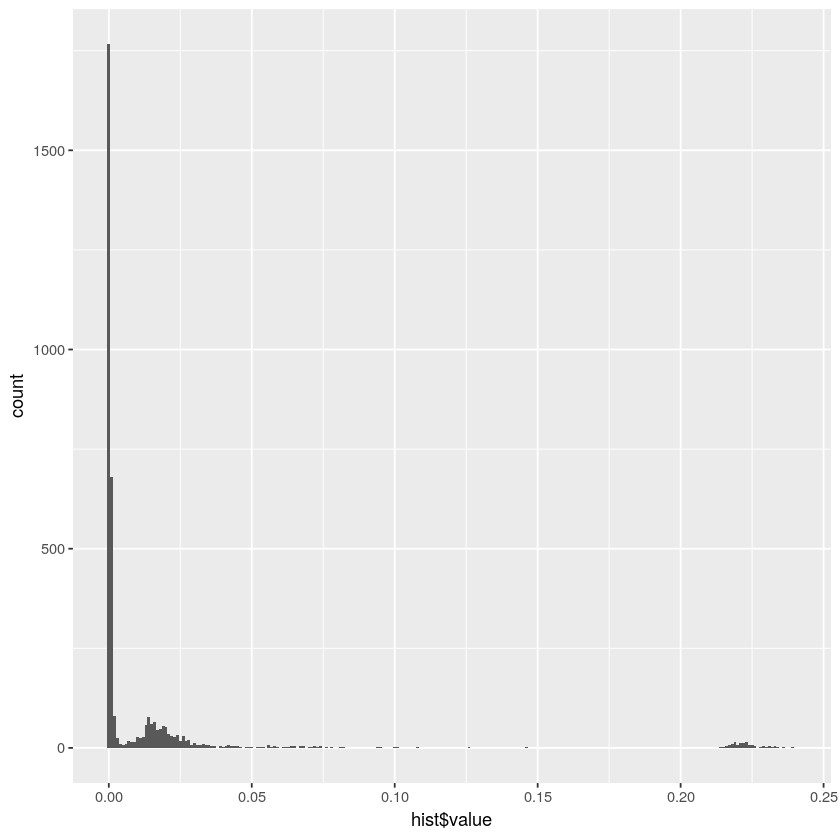

In [140]:
hist <- data.frame(value=data$response.time[which(data$response.time < 0.25)])

ggplot(hist, aes(hist$value)) + geom_histogram(binwidth=0.001)